In [47]:
# Import libraries:
import numpy as np
from matplotlib import pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# RF period (325 MHz frequency):
T = 1/(325*10**6)*10**9 # ns

# Load data from output txt file:
data = np.loadtxt('trace_output.txt')

# Figure directory:
dir = 'Figures/'

In [48]:
# Values along channel:
x_vals = []; y_vals = []; z_vals = []
px_vals = []; py_vals = []; pz_vals = []; ptotal_vals = []
t_vals = []; mod_t_vals = []
for i in range(data.shape[0]):
    x_vals.append(data[i][0]*0.1) # mm -> cm
    y_vals.append(data[i][1]*0.1)
    z_vals.append(data[i][2]*0.1)
    px = data[i][3]; py = data[i][4]; pz = data[i][5]
    px_vals.append(px) # MeV/c
    py_vals.append(py)
    pz_vals.append(pz)
    ptotal_vals.append(np.sqrt(px**2+py**2+pz**2))
    t = data[i][6]
    t_vals.append(t) # ns
    mod_t = t % T
    mod_t_vals.append(mod_t)
    del px, py, pz, t

    z = data[i][2]*0.001
    if z > 0.00 and z < 0.01:
        print(z)
        print(i)
    if z > 4.20 and z < 4.21:
        print(z)
        print(i)
    if z > 8.40 and z < 8.41:
        print(z)
        print(i)

0.00932384
87
4.20423
599
8.405719999999999
1110


In [49]:
z_vals[len(z_vals)-1]

np.float64(5567.66)

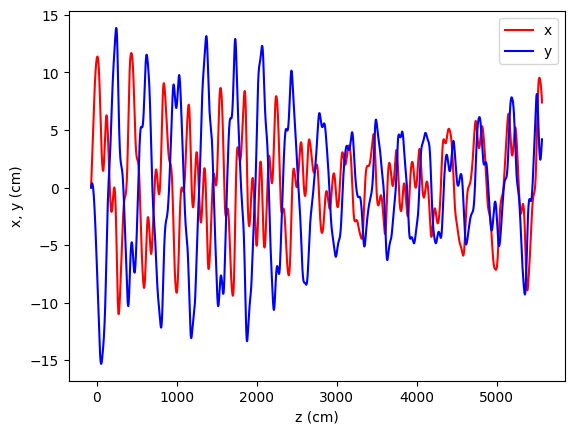

In [50]:
# Plot x, y along z:
plt.plot(z_vals,x_vals,color='red',label='x')
plt.plot(z_vals,y_vals,color='blue',label='y')
# lim = 800
# plt.plot(z_vals[:lim],x_vals[:lim],color='red',label='x')
# plt.plot(z_vals[:lim],y_vals[:lim],color='blue',label='y')
plt.xlabel('z (cm)')
plt.ylabel('x, y (cm)')
plt.legend()

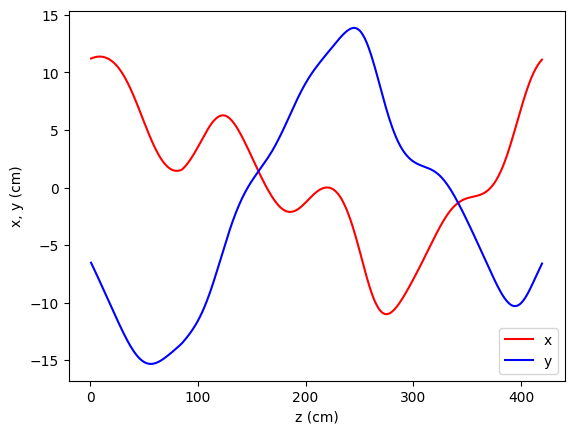

In [51]:
# Plot single period of data:
lower_lim = 87
upper_lim = 599
# lower_lim = 599
# upper_lim = 1110
plt.plot(z_vals[lower_lim:upper_lim],x_vals[lower_lim:upper_lim],color='red',label='x')
plt.plot(z_vals[lower_lim:upper_lim],y_vals[lower_lim:upper_lim],color='blue',label='y')
plt.xlabel('z (cm)')
plt.ylabel('x, y (cm)')
plt.legend()

Text(0, 0.5, 'y (cm)')

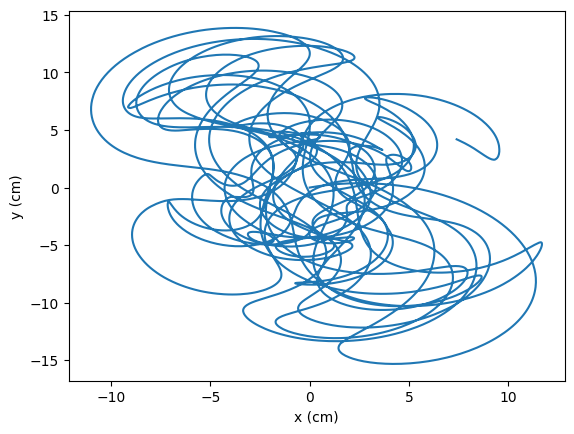

In [52]:
# Plot projection in x-y plane:
plt.plot(x_vals,y_vals)
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')

Text(0, 0.5, 'y (cm)')

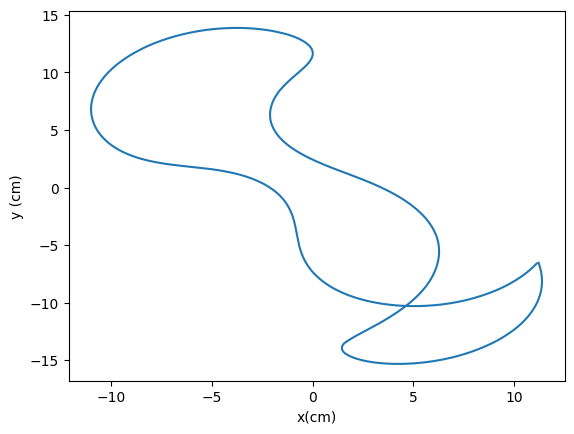

In [53]:
# Plot x-y trajectory for single period of data:
plt.plot(x_vals[lower_lim:upper_lim],y_vals[lower_lim:upper_lim])
plt.xlabel('x(cm)')
plt.ylabel('y (cm)')

In [54]:
# Load data from paper -- for single period:
dir = '/Users/criggall/Library/Mobile Documents/com~apple~CloudDocs/muon-cooling/'
xdata = np.genfromtxt(dir+'paper_x_vs_z.csv',delimiter=',')
xdata_x = []; xdata_z = []
for i in range(len(xdata)):
    xdata_z.append(xdata[i][0])
    xdata_x.append(xdata[i][1])
ydata = np.genfromtxt(dir+'paper_y_vs_z.csv',delimiter=',')
ydata_y = []; ydata_z = []
for i in range(len(ydata)):
    ydata_z.append(ydata[i][0])
    ydata_y.append(ydata[i][1])

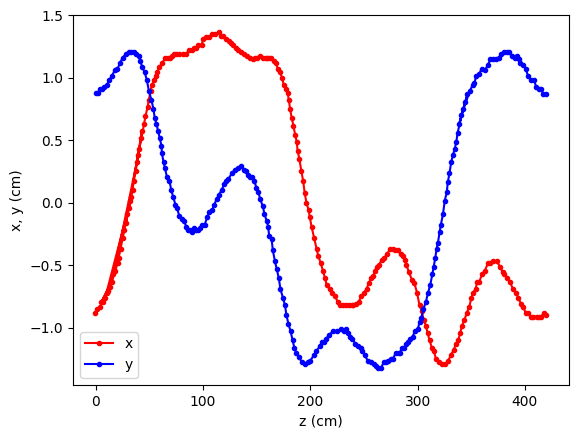

In [55]:
# Plot x, y along z from paper -- for single period:
plt.plot(xdata_z,xdata_x,color='red',label='x',marker='.')
plt.plot(ydata_z,ydata_y,color='blue',label='y',marker='.')
plt.xlabel('z (cm)')
plt.ylabel('x, y (cm)')
plt.legend()

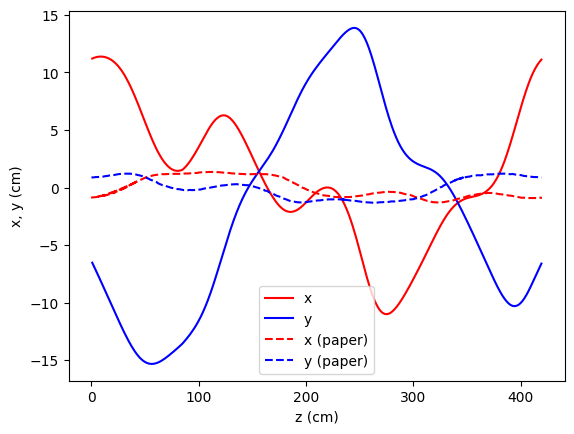

In [56]:
# Subplot of our simulation vs paper -- for single period:
plt.plot(z_vals[lower_lim:upper_lim],x_vals[lower_lim:upper_lim],color='red',label='x')
plt.plot(z_vals[lower_lim:upper_lim],y_vals[lower_lim:upper_lim],color='blue',label='y')
# lim = 800
# plt.plot(z_vals[:lim],x_vals[:lim],color='red',label='x (sim)')
# plt.plot(z_vals[:lim],y_vals[:lim],color='blue',label='y (sim)')
plt.plot(xdata_z,xdata_x,color='red',label='x (paper)',linestyle='dashed')
plt.plot(ydata_z,ydata_y,color='blue',label='y (paper)',linestyle='dashed')
plt.xlabel('z (cm)')
plt.ylabel('x, y (cm)')
plt.legend()

In [57]:
xint = xdata_x[0]
yint = ydata_y[0]
print('Starting x value: '+str(xint))
print('Starting y value: '+str(yint))

Starting x value: -0.8823529411764706
Starting y value: 0.8823529411764706


Text(0, 0.5, 'y (cm)')

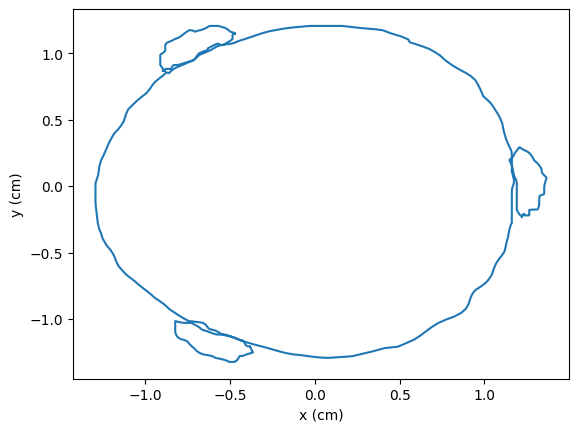

In [59]:
# Plot x-y trajeectory from paper -- for single period:
num = upper_lim - lower_lim
z_range = np.linspace(0,420,num)
x_interp = np.interp(z_range,xdata_z,xdata_x)
y_interp = np.interp(z_range,ydata_z,ydata_y)
plt.plot(x_interp,y_interp)
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')